In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = df
y = iris.target  # Species (0: Setosa, 1: Versicolor, 2: Virginica)

print("Independent Features (X):\n", X.head())
print("\nDependent Feature (y):\n", y[:10])
df.shape

Independent Features (X):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dependent Feature (y):
 [0 0 0 0 0 0 0 0 0 0]


(150, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

y_one_hot = to_categorical(y)

# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original Target Labels:\n", y[:10])
print("\nOne-Hot Encoded Target Labels:\n", y_one_hot[:10])
print("\nStandardized Features (First 5 Rows):\n", X_scaled[:5])

Original Target Labels:
 [0 0 0 0 0 0 0 0 0 0]

One-Hot Encoded Target Labels:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Standardized Features (First 5 Rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42, stratify=y)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),  # Input Layer
    Dense(32, activation='tanh'),  # Hidden Layer 1
    Dense(16, activation='relu'),  # Hidden Layer 2
    Dense(8, activation='relu'),   # Hidden Layer 3
    Dense(y_train.shape[1], activation='softmax')  # Output Layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,091 (12.07 KB)

 Trainable params: 3,091 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2583 - loss: 1.1620 - val_accuracy: 0.2333 - val_loss: 1.1386
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.2833 - loss: 1.1326 - val_accuracy: 0.2333 - val_loss: 1.1145
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.2833 - loss: 1.1058 - val_accuracy: 0.2333 - val_loss: 1.0914
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3000 - loss: 1.0801 - val_accuracy: 0.3000 - val_loss: 1.0707
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3750 - loss: 1.0570 - val_accuracy: 0.5000 - val_loss: 1.0526
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5083 - loss: 1.0370 - val_accuracy: 0.5667 - val_loss: 1.0387
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6333 - loss: 1.0213 - val_accuracy: 0.6000 - val_loss: 1.0251
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.6583 - loss: 1.0074 - val_accuracy: 0.6000 - val_lo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9667 - loss: 0.0786
Test Loss: 0.0786
Test Accuracy: 0.9667


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.9833 - loss: 0.0398 - val_accuracy: 0.9667 - val_loss: 0.0785
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9833 - loss: 0.0397 - val_accuracy: 0.9667 - val_loss: 0.0783
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9833 - loss: 0.0396 - val_accuracy: 0.9667 - val_loss: 0.0782
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9833 - loss: 0.0395 - val_accuracy: 0.9667 - val_loss: 0.0782
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9833 - loss: 0.0394 - val_accuracy: 0.9667 - val_loss: 0.0782
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9833 - loss: 0.0393 - val_accuracy: 0.9667 - val_loss: 0.0782
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9833 - loss: 0.0392 - val_accuracy: 0.9667 - val_loss: 0.0781
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9833 - loss: 0.0391 - val_accuracy: 0.9667 - va

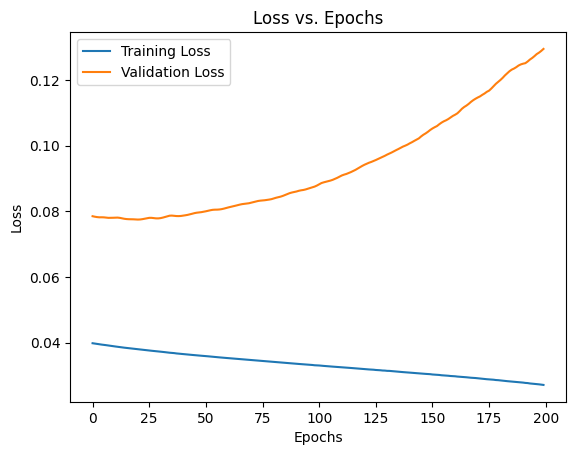

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#(No Regularization)
model = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),  # Hidden Layer 1
    Dense(16, activation='relu'),  # Hidden Layer 2
    Dense(y_train.shape[1], activation='softmax')  # Output Layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.regularizers import l1

# Model with L1 Regularization
model_l1 = Sequential([
    Dense(64, activation='tanh', kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh', kernel_regularizer=l1(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.regularizers import l2

# Model with L2 Regularization
model_l2 = Sequential([
    Dense(64, activation='tanh', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Dropout

# Model with Dropout
model_dropout = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Drop 20% of nodes
    Dense(32, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train all models
epochs = 100
batch_size = 64

history_no_reg = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
history_l1 = model_l1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
history_l2 = model_l2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
history_dropout = model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)

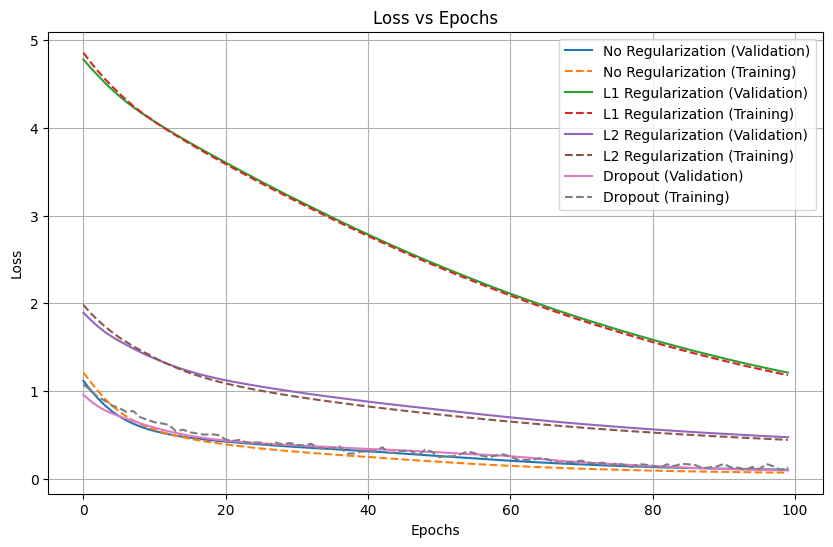

In [ ]:
# Function to Plot Loss vs Epochs
def plot_loss(histories, labels, title="Loss vs Epochs"):
    plt.figure(figsize=(10, 6))

    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label} (Validation)')
        plt.plot(history.history['loss'], linestyle='dashed', label=f'{label} (Training)')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot for all models
plot_loss(
    histories=[history_no_reg, history_l1, history_l2, history_dropout],
    labels=['No Regularization', 'L1 Regularization', 'L2 Regularization', 'Dropout']
)

In [ ]:
import numpy as np

def initialize_params():
    np.random.seed(42)  # For reproducibility
    w_0 = np.random.randn()  # Random initialization
    b_0 = np.random.randn()
    return w_0, b_0

# Initialize parameters
w, b = initialize_params()
print(f"Initial weight: {w:.4f}, Initial bias: {b:.4f}")

Initial weight: 0.4967, Initial bias: -0.1383


In [ ]:
def loss_function(w):
    return w**2 - 2*w + 1

def compute_gradient(w):
    return 2*w - 2

In [ ]:
def momentum_optimizer(w_init, lr=0.1, beta=0.9, tol=1e-6):
    w = w_init
    v = 0
    iteration = 1
    history = []  # Store loss values for plotting

    while True:
        grad = compute_gradient(w)
        v = beta * v + (1 - beta) * grad
        w_new = w - lr * v
        loss = loss_function(w_new)

        # Store iteration details
        history.append(loss)
        print(f"Iteration {iteration}: Weight = {w_new:.6f}, Loss = {loss:.6f}")

        # Check convergence (w_{t-1} = w_t)
        if abs(w_new - w) < tol:
            break

        w = w_new
        iteration += 1

    return history, iteration

# Run Momentum Optimizer
w_init, _ = initialize_params()
momentum_history, momentum_iterations = momentum_optimizer(w_init)

print(f"Momentum Optimizer converged in {momentum_iterations} iterations.")

Iteration 1: Weight = 0.506780, Loss = 0.243266
Iteration 2: Weight = 0.525703, Loss = 0.224957
Iteration 3: Weight = 0.552221, Loss = 0.200506
Iteration 4: Weight = 0.585042, Loss = 0.172191
Iteration 5: Weight = 0.622880, Loss = 0.142220
Iteration 6: Weight = 0.664476, Loss = 0.112576
Iteration 7: Weight = 0.708624, Loss = 0.084900
Iteration 8: Weight = 0.754184, Loss = 0.060425
Iteration 9: Weight = 0.800105, Loss = 0.039958
Iteration 10: Weight = 0.845431, Loss = 0.023892
Iteration 11: Weight = 0.889316, Loss = 0.012251
Iteration 12: Weight = 0.931026, Loss = 0.004757
Iteration 13: Weight = 0.969945, Loss = 0.000903
Iteration 14: Weight = 1.005573, Loss = 0.000031
Iteration 15: Weight = 1.037527, Loss = 0.001408
Iteration 16: Weight = 1.065535, Loss = 0.004295
Iteration 17: Weight = 1.089431, Loss = 0.007998
Iteration 18: Weight = 1.109149, Loss = 0.011914
Iteration 19: Weight = 1.124712, Loss = 0.015553
Iteration 20: Weight = 1.136225, Loss = 0.018557
Iteration 21: Weight = 1.1438

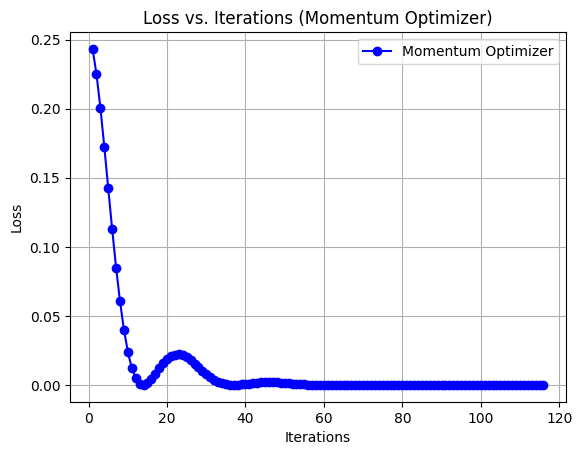

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss vs. Iterations for Momentum
plt.plot(range(1, len(momentum_history) + 1), momentum_history, label='Momentum Optimizer', color='blue', marker='o')

# Formatting the plot
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Momentum Optimizer)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def rmsprop_optimizer(w_init, lr=0.1, beta=0.9, epsilon=1e-8, tol=1e-6):
    w = w_init
    s = 0  # Initialize squared gradient accumulation
    iteration = 1
    history = []  # Store loss values for plotting

    while True:
        grad = compute_gradient(w)
        s = beta * s + (1 - beta) * grad**2  # Compute running average of squared gradients
        w_new = w - (lr / (np.sqrt(s) + epsilon)) * grad  # Update weight
        loss = loss_function(w_new)

        # Store iteration details
        history.append(loss)
        print(f"Iteration {iteration}: Weight = {w_new:.6f}, Loss = {loss:.6f}")

        # Check convergence (w_{t-1} = w_t)
        if abs(w_new - w) < tol:
            break

        w = w_new
        iteration += 1

    return history, iteration

# Run RMSProp Optimizer
w_init, _ = initialize_params()
rmsprop_history, rmsprop_iterations = rmsprop_optimizer(w_init)

print(f"RMSProp Optimizer converged in {rmsprop_iterations} iterations.")

Iteration 1: Weight = 0.812942, Loss = 0.034991
Iteration 2: Weight = 0.928296, Loss = 0.005141
Iteration 3: Weight = 0.974408, Loss = 0.000655
Iteration 4: Weight = 0.991730, Loss = 0.000068
Iteration 5: Weight = 0.997629, Loss = 0.000006
Iteration 6: Weight = 0.999412, Loss = 0.000000
Iteration 7: Weight = 0.999878, Loss = 0.000000
Iteration 8: Weight = 0.999980, Loss = 0.000000
Iteration 9: Weight = 0.999998, Loss = 0.000000
Iteration 10: Weight = 1.000000, Loss = 0.000000
Iteration 11: Weight = 1.000000, Loss = 0.000000
RMSProp Optimizer converged in 11 iterations.


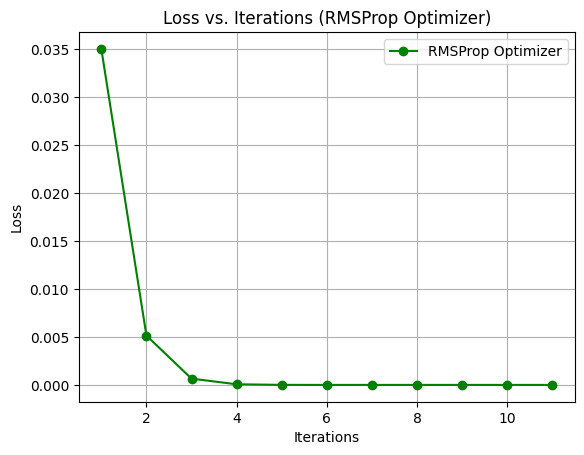

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss vs. Iterations for RMSProp
plt.plot(range(1, len(rmsprop_history) + 1), rmsprop_history, label='RMSProp Optimizer', color='green', marker='o')

# Formatting the plot
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (RMSProp Optimizer)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def adam_optimizer(w_init, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, tol=1e-6):
    w = w_init
    m = 0  # Initialize first moment
    v = 0  # Initialize second moment
    iteration = 1
    history = []  # Store loss values for plotting

    while True:
        grad = compute_gradient(w)

        # Compute biased first and second moment estimates
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2

        # Bias correction
        m_hat = m / (1 - beta1**iteration)
        v_hat = v / (1 - beta2**iteration)

        # Update weight
        w_new = w - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
        loss = loss_function(w_new)

        # Store iteration details
        history.append(loss)
        print(f"Iteration {iteration}: Weight = {w_new:.6f}, Loss = {loss:.6f}")

        # Check convergence (w_{t-1} = w_t)
        if abs(w_new - w) < tol:
            break

        w = w_new
        iteration += 1

    return history, iteration

# Run Adam Optimizer
w_init, _ = initialize_params()
adam_history, adam_iterations = adam_optimizer(w_init)

print(f"Adam Optimizer converged in {adam_iterations} iterations.")

Iteration 1: Weight = 0.596714, Loss = 0.162639
Iteration 2: Weight = 0.695540, Loss = 0.092696
Iteration 3: Weight = 0.791900, Loss = 0.043306
Iteration 4: Weight = 0.883961, Loss = 0.013465
Iteration 5: Weight = 0.969270, Loss = 0.000944
Iteration 6: Weight = 1.044869, Loss = 0.002013
Iteration 7: Weight = 1.107752, Loss = 0.011610
Iteration 8: Weight = 1.155591, Loss = 0.024208
Iteration 9: Weight = 1.187377, Loss = 0.035110
Iteration 10: Weight = 1.203557, Loss = 0.041435
Iteration 11: Weight = 1.205664, Loss = 0.042298
Iteration 12: Weight = 1.195810, Loss = 0.038341
Iteration 13: Weight = 1.176291, Loss = 0.031078
Iteration 14: Weight = 1.149388, Loss = 0.022317
Iteration 15: Weight = 1.117297, Loss = 0.013759
Iteration 16: Weight = 1.082121, Loss = 0.006744
Iteration 17: Weight = 1.045883, Loss = 0.002105
Iteration 18: Weight = 1.010506, Loss = 0.000110
Iteration 19: Weight = 0.977777, Loss = 0.000494
Iteration 20: Weight = 0.949260, Loss = 0.002575
Iteration 21: Weight = 0.9262

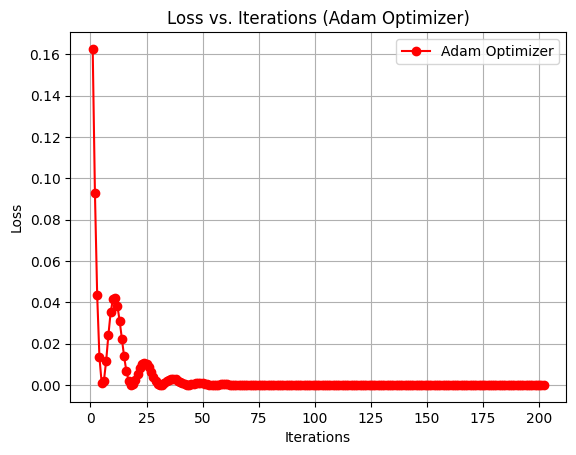

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss vs. Iterations for Adam
plt.plot(range(1, len(adam_history) + 1), adam_history, label='Adam Optimizer', color='red', marker='o')

# Formatting the plot
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Adam Optimizer)')
plt.legend()
plt.grid()
plt.show()

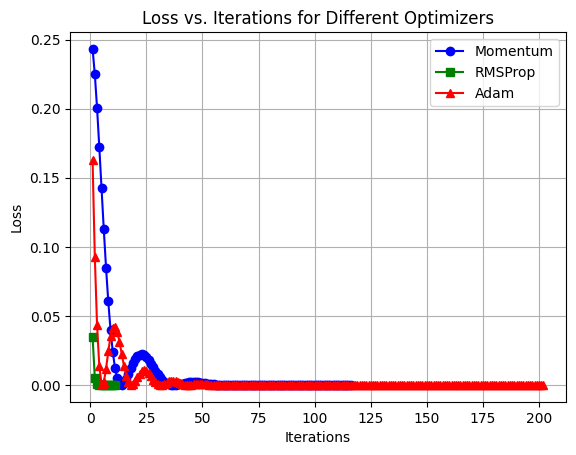

In [ ]:
import matplotlib.pyplot as plt

# Plot loss vs. iterations for all optimizers
plt.plot(range(1, len(momentum_history) + 1), momentum_history, label='Momentum', color='blue', marker='o')
plt.plot(range(1, len(rmsprop_history) + 1), rmsprop_history, label='RMSProp', color='green', marker='s')
plt.plot(range(1, len(adam_history) + 1), adam_history, label='Adam', color='red', marker='^')

# Formatting the plot
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for Different Optimizers')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Experimenting with different learning rates
learning_rates = [0.001, 0.01, 0.1]

# Store results
results = {}

for lr in learning_rates:
    print(f"\n=== Learning Rate: {lr} ===")

    # Run Momentum
    momentum_history, momentum_iters = momentum_optimizer(w_init, lr=lr)
    print(f"Momentum converged in {momentum_iters} iterations.")

    # Run RMSProp
    rmsprop_history, rmsprop_iters = rmsprop_optimizer(w_init, lr=lr)
    print(f"RMSProp converged in {rmsprop_iters} iterations.")

    # Run Adam
    adam_history, adam_iters = adam_optimizer(w_init, lr=lr)
    print(f"Adam converged in {adam_iters} iterations.")

    # Store results
    results[lr] = {
        "Momentum": (momentum_history, momentum_iters),
        "RMSProp": (rmsprop_history, rmsprop_iters),
        "Adam": (adam_history, adam_iters)
    }

Streaming output truncated to the last 5000 lines.
Iteration 1546: Weight = 0.978089, Loss = 0.000480
Iteration 1547: Weight = 0.978133, Loss = 0.000478
Iteration 1548: Weight = 0.978178, Loss = 0.000476
Iteration 1549: Weight = 0.978222, Loss = 0.000474
Iteration 1550: Weight = 0.978267, Loss = 0.000472
Iteration 1551: Weight = 0.978311, Loss = 0.000470
Iteration 1552: Weight = 0.978355, Loss = 0.000468
Iteration 1553: Weight = 0.978399, Loss = 0.000467
Iteration 1554: Weight = 0.978443, Loss = 0.000465
Iteration 1555: Weight = 0.978487, Loss = 0.000463
Iteration 1556: Weight = 0.978531, Loss = 0.000461
Iteration 1557: Weight = 0.978575, Loss = 0.000459
Iteration 1558: Weight = 0.978618, Loss = 0.000457
Iteration 1559: Weight = 0.978662, Loss = 0.000455
Iteration 1560: Weight = 0.978705, Loss = 0.000453
Iteration 1561: Weight = 0.978749, Loss = 0.000452
Iteration 1562: Weight = 0.978792, Loss = 0.000450
Iteration 1563: Weight = 0.978835, Loss = 0.000448
Iteration 1564: Weight = 0.9788

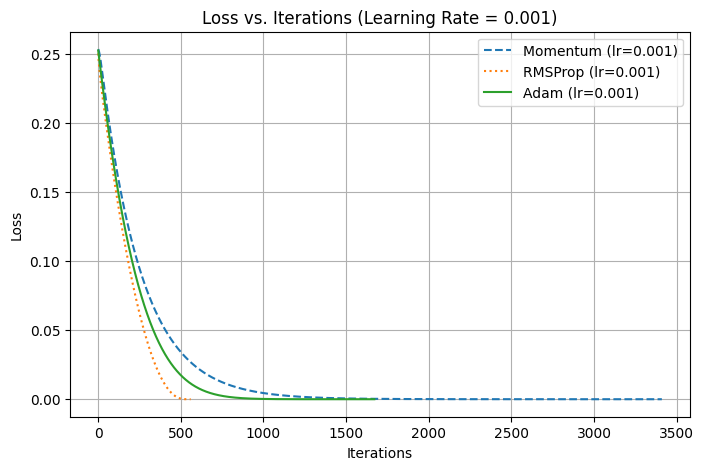

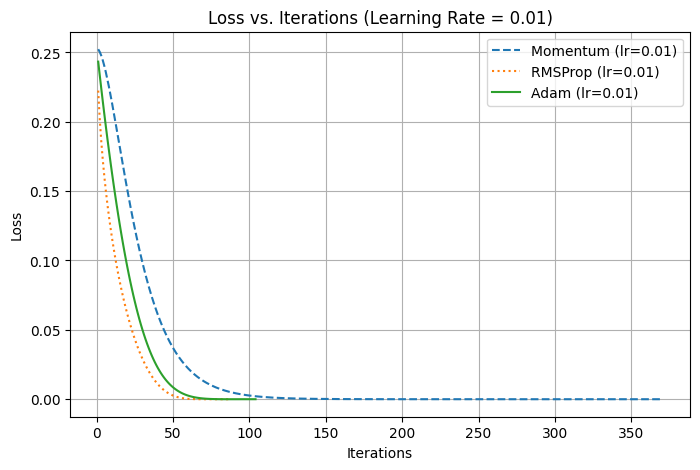

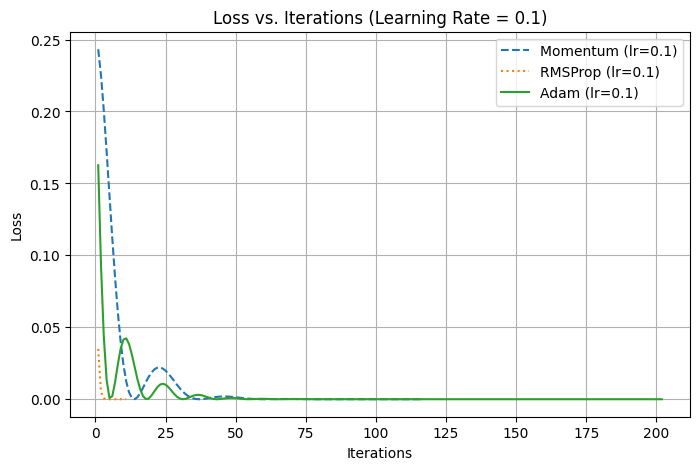

In [ ]:
import matplotlib.pyplot as plt

for lr in learning_rates:
    plt.figure(figsize=(8, 5))

    # Extract histories
    momentum_history, _ = results[lr]["Momentum"]
    rmsprop_history, _ = results[lr]["RMSProp"]
    adam_history, _ = results[lr]["Adam"]

    # Plot for each optimizer
    plt.plot(range(1, len(momentum_history) + 1), momentum_history, label=f'Momentum (lr={lr})', linestyle='dashed')
    plt.plot(range(1, len(rmsprop_history) + 1), rmsprop_history, label=f'RMSProp (lr={lr})', linestyle='dotted')
    plt.plot(range(1, len(adam_history) + 1), adam_history, label=f'Adam (lr={lr})', linestyle='solid')

    # Formatting
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss vs. Iterations (Learning Rate = {lr})')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model

# Load VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg16.trainable = False  # F model

# Load ResNet50
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet50.trainable = False  # F  model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Custom VGG16 Model
custom_vgg16 = Sequential([
    vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

custom_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the customized VGG16 model
history = custom_vgg16.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Evaluate
loss, accuracy = custom_vgg16.evaluate(x_test, y_test)
print(f"Custom VGG16 - Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 756s 965ms/step - accuracy: 0.4208 - loss: 1.6216 - val_accuracy: 0.5600 - val_loss: 1.2489
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 794s 955ms/step - accuracy: 0.5431 - loss: 1.2981 - val_accuracy: 0.5776 - val_loss: 1.2004
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 824s 983ms/step - accuracy: 0.5701 - loss: 1.2240 - val_accuracy: 0.5868 - val_loss: 1.1688
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 806s 988ms/step - accuracy: 0.5894 - loss: 1.1701 - val_accuracy: 0.5967 - val_loss: 1.1455
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 770s 985ms/step - accuracy: 0.5942 - loss: 1.1570 - val_accuracy: 0.5972 - val_loss: 1.1448
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 794s 976ms/step - accuracy: 0.6057 - loss: 1.1256 - val_accuracy: 0.6075 - val_loss: 1.1181
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 785s 954ms/step - accuracy: 0.6143 - loss: 1.0991 - val_accuracy: 0.6061 - val_loss: 1.1210
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 760s 973ms/step - accuracy: 0.6203 -

In [ ]:
import time
import tensorflow.profiler.experimental as profiler

# Measure Inference Time
start_time = time.time()
_ = custom_vgg16.predict(x_test[:1])
inference_time = (time.time() - start_time) * 1000

print(f"Inference Time: {inference_time:.2f} ms")

# Measure FLOPs
def get_flops(model):
    profiler.start('logdir')
    model.predict(x_test[:1])
    profiler.stop()
    return "Check logdir for FLOPs estimation"

get_flops(custom_vgg16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Inference Time: 299.94 ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


'Check logdir for FLOPs estimation'

In [ ]:
# Compile ResNet-50 model
resnet50_model = Sequential([
    resnet50,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate on Test Data
loss_resnet, acc_resnet = resnet50_model.evaluate(x_test, y_test)
print(f"ResNet-50 - Loss: {loss_resnet:.4f}, Accuracy: {acc_resnet:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 145ms/step - accuracy: 0.1010 - loss: 2.8496
ResNet-50 - Loss: 2.8569, Accuracy: 0.1021


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Define AlexNet architecture
alexnet_model = Sequential([
    Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2)),

    Conv2D(384, (3, 3), activation='relu', padding ='same'),
    Conv2D(384, (3, 3), activation='relu', padding ='same'),
    Conv2D(256, (3, 3), activation='relu', padding ='same'),
    MaxPooling2D(pool_size=(2, 2) ,strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate on Test Data
loss_alexnet, acc_alexnet = alexnet_model.evaluate(x_test, y_test)
print(f"AlexNet - Loss: {loss_alexnet:.4f}, Accuracy: {acc_alexnet:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 103s 328ms/step - accuracy: 0.1038 - loss: 2.3029
AlexNet - Loss: 2.3030, Accuracy: 0.1038
